In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data


In [2]:
df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/TCHOL_J.XPT')

In [3]:
df.drop('LBDTCSI',axis=1,inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6738 entries, 0 to 7434
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SEQN    6738 non-null   float64
 1   LBXTC   6738 non-null   float64
dtypes: float64(2)
memory usage: 157.9 KB


In [4]:
demo = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.XPT')

In [5]:
demo_merged = demo.merge(df,on='SEQN',how='right')


In [6]:
demo_merged= demo_merged[demo_merged.RIDAGEYR>=20].copy()
demo_merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,LBXTC
0,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82,157.0
3,93708.0,10.0,2.0,2.0,66.0,NaN,5.0,6.0,2.0,NaN,...,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63,209.0
4,93709.0,10.0,2.0,2.0,75.0,NaN,4.0,4.0,1.0,NaN,...,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41,176.0
5,93711.0,10.0,2.0,1.0,56.0,NaN,5.0,6.0,2.0,NaN,...,1.0,3.0,11178.260106,12390.919724,2.0,134.0,15.0,15.0,5.00,238.0
7,93713.0,10.0,2.0,1.0,67.0,NaN,3.0,3.0,1.0,NaN,...,2.0,NaN,174806.575152,166841.660681,1.0,140.0,6.0,6.0,2.65,184.0


In [7]:
df = demo_merged[['SEQN','LBXTC']].copy()
df.head()

,SEQN,LBXTC
0,93705.0,157.0
3,93708.0,209.0
4,93709.0,176.0
5,93711.0,238.0
7,93713.0,184.0


# EDA

## Distribution of total cholesterol

<AxesSubplot:>

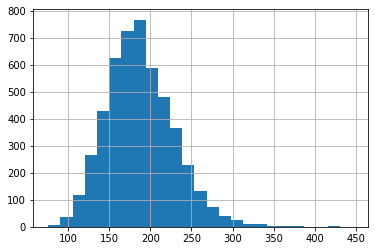

In [8]:
df.LBXTC.hist(bins=25)

The distribution of total cholesterol looks normal but right skewed.  There are some extreme values above 400.

# Exploring demographic data in relation to total cholesterol

In [9]:
demo_merged.corr()['LBXTC'].sort_values()

RIDEXPRG   -0.097854
SDMVPSU    -0.086771
DMDHHSZA   -0.043433
RIDEXMON   -0.041857
DMDHHSZE   -0.031607
MIAINTRP   -0.020787
DMDHRMAZ   -0.020375
SIAINTRP   -0.017760
DMDMARTL   -0.016780
DMDHHSIZ   -0.016450
DMDFMSIZ   -0.007298
SDMVSTRA   -0.005437
SEQN       -0.002398
INDHHIN2   -0.001406
DMQADFC     0.000745
INDFMIN2    0.001280
FIAINTRP    0.003044
DMDYRSUS    0.006794
DMDHHSZB    0.010582
DMDHREDZ    0.011015
DMDHRAGZ    0.012087
RIDRETH1    0.012357
RIDRETH3    0.019720
WTMEC2YR    0.019866
FIALANG     0.020708
DMDEDUC2    0.024758
WTINT2YR    0.025337
DMDCITZN    0.025884
DMDHRGND    0.026441
FIAPROXY    0.030869
SIAPROXY    0.033639
MIAPROXY    0.035220
MIALANG     0.037110
SIALANG     0.038495
INDFMPIR    0.042540
DMDBORN4    0.043806
AIALANGA    0.046639
RIDAGEYR    0.052039
DMDHSEDZ    0.056316
DMQMILIZ    0.064595
RIAGENDR    0.090433
LBXTC       1.000000
SDDSRVYR         NaN
RIDSTATR         NaN
RIDAGEMN         NaN
RIDEXAGM         NaN
DMDEDUC3         NaN
Name: LBXTC, 

There is not much correlation between any of the demographic variables and total cholesterol

## Gender

<AxesSubplot:xlabel='RIAGENDR', ylabel='LBXTC'>

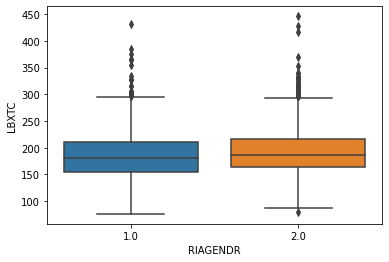

In [10]:
sns.boxplot(x='RIAGENDR', y='LBXTC', data=demo_merged)

The boxplots are relatively similar with respect to gender.  

## Race

<AxesSubplot:xlabel='RIDRETH3', ylabel='LBXTC'>

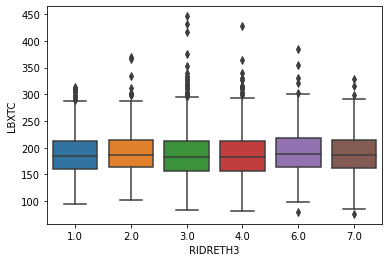

In [11]:
sns.boxplot(x='RIDRETH3', y='LBXTC', data=demo_merged)


The boxplots again are relatively similar.  However non-Hispanic whites (3.0) have many outliers at a higher total cholesterol level.

## Age

<AxesSubplot:xlabel='RIDAGEYR', ylabel='LBXTC'>

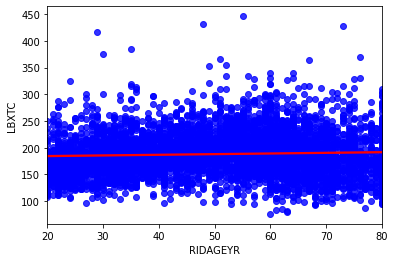

In [13]:
sns.regplot(x='RIDAGEYR',  y='LBXTC', data=demo_merged, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As you can see there is not much of a linear relationship between age and total cholesterol.  

The demographic data included more variables involving information such as educational level and military status.  These are not going to be explored.  To see a complete list of all the data in the demographics file see https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/DEMO_J.htm

## BMI and cholesterol and other body measures

In [15]:
body_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BMX_J.XPT')
body_df = body_df.merge(df,on='SEQN',how='right')
body_df.head()

,SEQN,BMDSTATS,BMXWT,BMIWT,BMXRECUM,BMIRECUM,BMXHEAD,BMIHEAD,BMXHT,BMIHT,...,BMILEG,BMXARML,BMIARML,BMXARMC,BMIARMC,BMXWAIST,BMIWAIST,BMXHIP,BMIHIP,LBXTC
0,93705.0,1.0,79.5,NaN,NaN,NaN,NaN,NaN,158.3,NaN,...,NaN,36.0,NaN,32.0,NaN,101.8,NaN,110.0,NaN,157.0
1,93708.0,1.0,53.5,NaN,NaN,NaN,NaN,NaN,150.2,NaN,...,NaN,30.6,NaN,27.4,NaN,88.2,NaN,90.1,NaN,209.0
2,93709.0,1.0,88.8,NaN,NaN,NaN,NaN,NaN,151.1,NaN,...,NaN,36.0,NaN,38.1,NaN,113.0,NaN,131.3,NaN,176.0
3,93711.0,1.0,62.1,NaN,NaN,NaN,NaN,NaN,170.6,NaN,...,NaN,37.2,NaN,30.8,NaN,86.6,NaN,90.7,NaN,238.0
4,93713.0,1.0,74.9,NaN,NaN,NaN,NaN,NaN,178.6,NaN,...,NaN,41.4,NaN,30.6,NaN,99.7,NaN,91.0,NaN,184.0


In [16]:
body_df.corr()['LBXTC'].sort_values()

BMIWT      -0.077661
BMXHT      -0.074784
BMXLEG     -0.067784
BMXARML    -0.063120
BMDSTATS   -0.049500
BMXWT      -0.037072
BMXHIP     -0.012850
BMXARMC    -0.010300
BMXBMI     -0.008350
BMXWAIST   -0.004853
SEQN       -0.002398
BMIHT       0.209798
LBXTC       1.000000
BMXRECUM         NaN
BMIRECUM         NaN
BMXHEAD          NaN
BMIHEAD          NaN
BMILEG           NaN
BMIARML          NaN
BMIARMC          NaN
BMIWAIST         NaN
BMIHIP           NaN
Name: LBXTC, dtype: float64

As with demographic data there appears to be no strong correlation with body measures and total cholesterol.

##  Compairing height, weight, bmi, and total cholesterol

<AxesSubplot:xlabel='BMXWT', ylabel='LBXTC'>

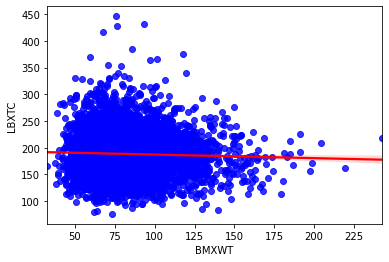

In [17]:
sns.regplot(x='BMXWT',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As can be seen there is not much correlation between weight and cholesterol level.

<AxesSubplot:xlabel='BMXHT', ylabel='LBXTC'>

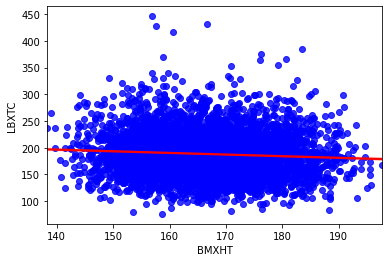

In [18]:
sns.regplot(x='BMXHT',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As height increases, total cholesterol slightly decreases.

<AxesSubplot:xlabel='BMXBMI', ylabel='LBXTC'>

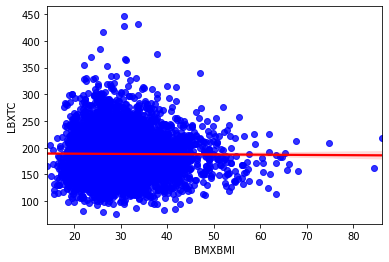

In [19]:
sns.regplot(x='BMXBMI',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

There doesn't appear to be much correlation between body mass index and total cholesterol.  All three replots do show outliers.

<AxesSubplot:xlabel='BMXWAIST', ylabel='LBXTC'>

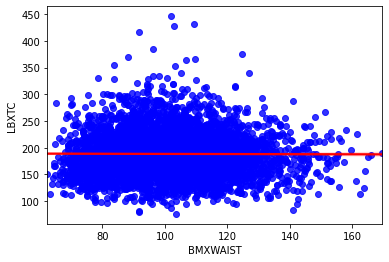

In [20]:
sns.regplot(x='BMXWAIST',  y='LBXTC', data=body_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

Again there isn't much correlation between waist circumference and total cholesterol level.

## Examining blood pressure and pulse with respect to total cholesterol

In [21]:
bp_df = pd.read_sas('https://wwwn.cdc.gov/Nchs/Nhanes/2017-2018/BPX_J.XPT')
bp_df = bp_df.merge(df,on='SEQN',how='right')
bp_df.head()

,SEQN,PEASCCT1,BPXCHR,BPAARM,BPACSZ,BPXPLS,BPXPULS,BPXPTY,BPXML1,BPXSY1,...,BPXSY2,BPXDI2,BPAEN2,BPXSY3,BPXDI3,BPAEN3,BPXSY4,BPXDI4,BPAEN4,LBXTC
0,93705.0,NaN,NaN,1.0,4.0,52.0,1.0,1.0,220.0,NaN,...,NaN,NaN,NaN,202.0,62.0,2.0,198.0,74.0,2.0,157.0
1,93708.0,NaN,NaN,1.0,3.0,68.0,1.0,1.0,170.0,NaN,...,138.0,78.0,2.0,144.0,76.0,2.0,144.0,74.0,2.0,209.0
2,93709.0,NaN,NaN,1.0,5.0,74.0,1.0,1.0,140.0,120.0,...,118.0,66.0,2.0,118.0,68.0,2.0,NaN,NaN,NaN,176.0
3,93711.0,NaN,NaN,1.0,4.0,62.0,1.0,1.0,130.0,108.0,...,94.0,68.0,2.0,102.0,64.0,2.0,NaN,NaN,NaN,238.0
4,93713.0,NaN,NaN,1.0,4.0,90.0,1.0,1.0,130.0,104.0,...,104.0,74.0,2.0,106.0,72.0,2.0,NaN,NaN,NaN,184.0


In [22]:
bp_df.corr()['LBXTC'].sort_values()

BPAEN4     -0.075192
BPXPULS    -0.052294
BPAEN3     -0.028860
BPAEN2     -0.027757
BPXPTY     -0.027446
PEASCCT1   -0.025016
BPAARM     -0.013855
BPACSZ     -0.004530
SEQN       -0.002398
BPXPLS      0.052216
BPXSY4      0.068941
BPXML1      0.090942
BPXSY3      0.101216
BPXSY2      0.105505
BPXSY1      0.113346
BPXDI2      0.124571
BPXDI1      0.125118
BPXDI3      0.130414
BPXDI4      0.170820
LBXTC       1.000000
BPXCHR           NaN
BPAEN1           NaN
Name: LBXTC, dtype: float64

No large correlation can be seen

For systolic and diastolic readings there were up to 4 readings taken.  I am going to average all 4 into 1 systolic and 1 diastolic reading.

In [26]:
bp_df['Systolic'] = bp_df[['BPXSY1','BPXSY2','BPXSY3','BPXSY4']].mean(axis=1)
bp_df["Diastolic"] = bp_df[['BPXDI1','BPXDI2','BPXDI3','BPXDI4']].mean(axis=1)

<AxesSubplot:xlabel='Systolic', ylabel='LBXTC'>

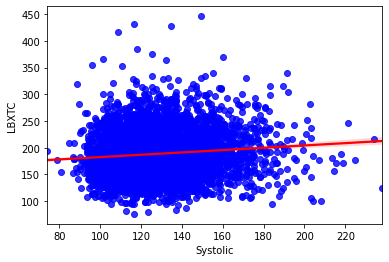

In [27]:
sns.regplot(x='Systolic',  y='LBXTC', data=bp_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

As systolic levels rise, total cholesterol slightly rises.

<AxesSubplot:xlabel='Diastolic', ylabel='LBXTC'>

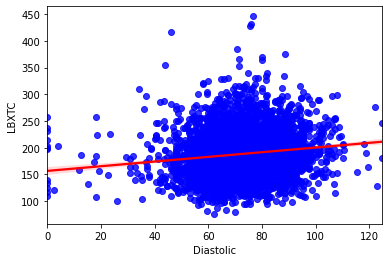

In [28]:
sns.regplot(x='Diastolic',  y='LBXTC', data=bp_df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

The same can be seen with diastolic levels, as the levels rise, total cholesterol slightly rises.  Looking at the distributions of systolic and diastolic variables...

<AxesSubplot:>

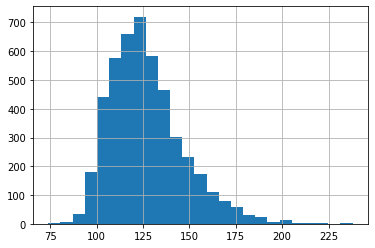

In [29]:
bp_df.Systolic.hist(bins=25)

The distribution is right skewed with some extreme outliers above 225.

<AxesSubplot:>

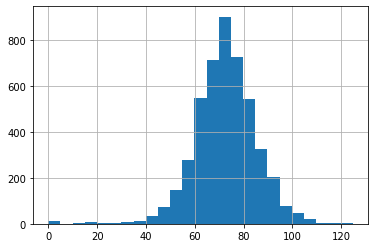

In [30]:
bp_df.Diastolic.hist(bins=25)

The diastolic distribution appears more normal.  Values of 0 are more than likely missing values.